Saving resampled_data_final_cleaned (5).csv to resampled_data_final_cleaned (5) (2).csv
데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total_Time_sec        2000 non-null   float64
 1   Avg_RPM               2000 non-null   float64
 2   Final_Rotation_rot    2000 non-null   float64
 3   Stall_Max_Value       2000 non-null   float64
 4   Stall_Increase_Time1  2000 non-null   float64
 5   Stall_Increase_Time2  2000 non-null   float64
 6   Stall_Increase_Pos1   2000 non-null   float64
 7   Stall_Increase_Pos2   2000 non-null   float64
 8   Total_Rotation_deg    2000 non-null   float64
 9   Max_RPM               2000 non-null   float64
 10  RPM_StdDev            2000 non-null   float64
 11  label                 2000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 187.6+ KB

변환된 레이블:
    label  label_

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:55:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


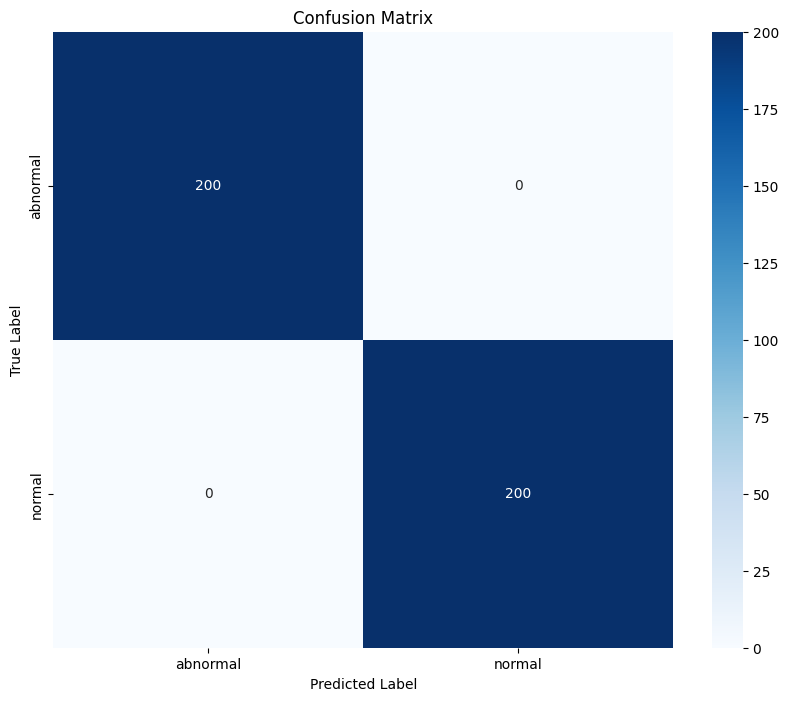

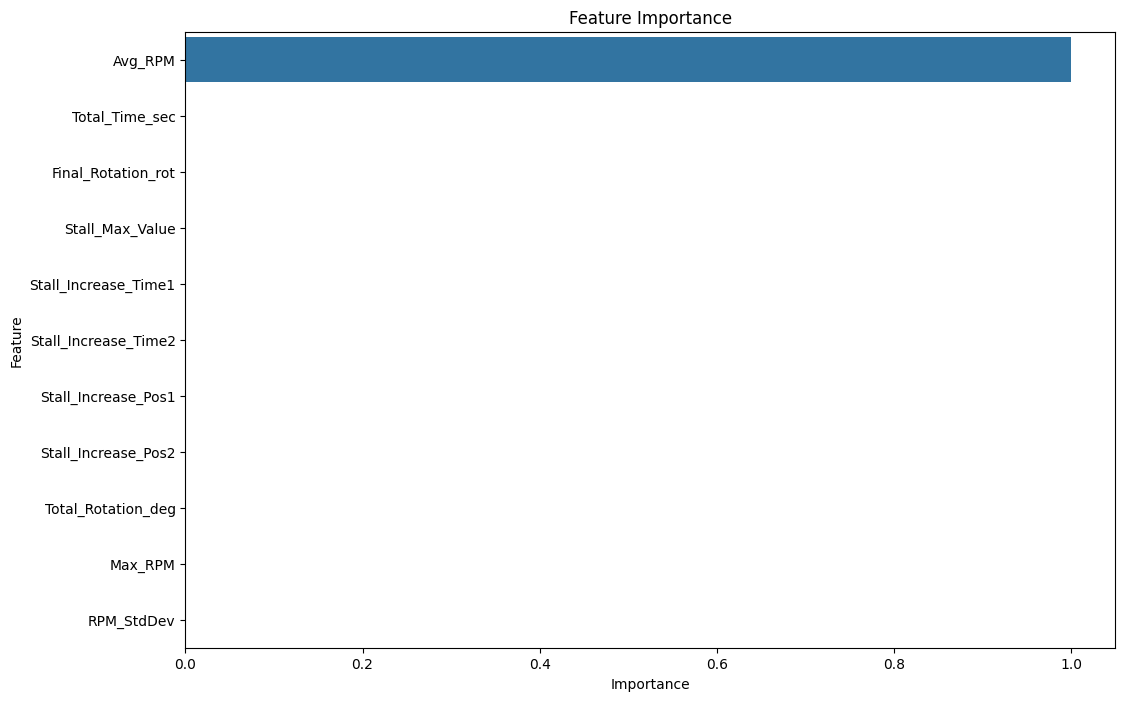


가장 중요한 피처:
                feature  importance
1               Avg_RPM         1.0
0        Total_Time_sec         0.0
2    Final_Rotation_rot         0.0
3       Stall_Max_Value         0.0
4  Stall_Increase_Time1         0.0
5  Stall_Increase_Time2         0.0
6   Stall_Increase_Pos1         0.0
7   Stall_Increase_Pos2         0.0
8    Total_Rotation_deg         0.0
9               Max_RPM         0.0

모델과 LabelEncoder가 'xgb_model.pkl'과 'label_encoder.pkl' 파일로 저장되었습니다.


In [6]:
# 1. 라이브러리 설치 및 임포트
# XGBoost 라이브러리 설치
!pip install scikit-learn pandas xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 2. 데이터 불러오기
# Colab에 파일을 직접 업로드하는 경우
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)

# 3. 데이터 전처리 및 탐색
print("데이터셋 정보:")
df.info()

# 'label' 컬럼을 정수형 레이블로 인코딩
df['label_encoded'] = df['label'].map({'normal': 0, 'abnormal': 1})
print("\n변환된 레이블:")
print(df[['label', 'label_encoded']].head())


# 피처(X)와 타겟(y) 분리
features = df.drop(['label', 'label_encoded'], axis=1)
target = df['label_encoded']

# 4. 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

print(f"\n학습 데이터셋 크기: {X_train.shape[0]}개")
print(f"테스트 데이터셋 크기: {X_test.shape[0]}개")

# 5. 모델 학습 (XGBoost)
# XGBoost 분류기 모델을 초기화하고 학습합니다.
# objective='multi:softmax'와 num_class로 다중 클래스 분류를 명시합니다.
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # 이진 분류용
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 6. 예측 및 성능 평가
y_pred = xgb_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모델 정확도: {accuracy:.4f}")

# 분류 리포트 출력
print("\n분류 리포트:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 7. 피처 중요도 시각화
# 모델이 어떤 특성을 중요하게 생각했는지 확인합니다.
feature_importance = pd.DataFrame({
    'feature': features.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("\n가장 중요한 피처:")
print(feature_importance.head(10))

# 8. 모델과 인코더 저장
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("\n모델과 LabelEncoder가 'xgb_model.pkl'과 'label_encoder.pkl' 파일로 저장되었습니다.")

In [8]:
# 1. 변환 결과 일부 확인
print("\n변환된 레이블 일부:")
print(df[['label', 'label_encoded']].head(10))  # 처음 10행 확인

# 2. 각 클래스별 샘플 개수 확인
print("\n각 레이블별 샘플 수:")
print(df['label_encoded'].value_counts())



변환된 레이블 일부:
    label  label_encoded
0  normal              1
1  normal              1
2  normal              1
3  normal              1
4  normal              1
5  normal              1
6  normal              1
7  normal              1
8  normal              1
9  normal              1

각 레이블별 샘플 수:
label_encoded
1    1000
0    1000
Name: count, dtype: int64
